## PCA on Census

Plotting the PCs as a scatter and coloring them by the DSD level poverty headcount index to observe distribution (clustering).

In [32]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd
import geopandas as gpd
#from thefuzz import process
#from thefuzz import fuzz
import matplotlib.pyplot as plt
import numpy as np 

# DSD level poverty headcount index got from the department of census and statistics report
dsd_data = pd.read_csv('/Users/chanukaalgama/Library/CloudStorage/OneDrive-LIRNEasia/DAP PROJECTS/RS + CDR Poverty Mapping/Data/processed/dsd_headcount_index.csv')
dsd_data = dsd_data[['dsd_name', 'code_7', 'headcount_index']].copy()
# Sri lanka Shapefile

data_shapefile = gpd.read_file("/Users/chanukaalgama/Library/CloudStorage/OneDrive-LIRNEasia/DAP PROJECTS/RS + CDR Poverty Mapping/Data/sri_lanka_gnd_shape_files/sri_lanka_gnd.shp")

# Read PCA census data
census_data = pd.read_csv('/Users/chanukaalgama/Library/CloudStorage/OneDrive-LIRNEasia/DAP PROJECTS/RS + CDR Poverty Mapping/Data/raw/pca_census.csv')

In [33]:
dsd_data['headcount_index'].describe()

count    14022.000000
mean         8.264671
std          5.151602
min          0.620000
25%          5.530000
50%          7.100000
75%          9.420000
max         45.140000
Name: headcount_index, dtype: float64

In [34]:
def mapping_headcount(headcount):
    
    mapped_value = []
    for x in headcount:
        if x < 7:
            mapped = 1
        elif x < 14:
            mapped = 2
        elif x < 21:
            mapped = 3
        elif x < 28:
            mapped = 4
        elif x < 35:
            mapped = 5
        elif x < 42:
            mapped = 6
        else:
            mapped = 7
        mapped_value.append(mapped)
    
    return mapped_value


def mapping_pc1(pc1):
    
    mapped_value = []
    for x in pc1:
        if x < -10:
            mapped = 1
        elif x < -5:
            mapped = 2
        elif x < 0:
            mapped = 3
        elif x < 5:
            mapped = 4
        elif x < 10:
            mapped = 5
        elif x < 15:
            mapped = 6
        else:
            mapped = 7
        mapped_value.append(mapped)
    
    return mapped_value

In [35]:
merged = census_data.merge(dsd_data, left_on= 'gnd_id', right_on= 'code_7', how= 'inner')

merged.drop(columns=['code_7', 'dsd_name'])

merged = merged.dropna(subset=['PC1', 'headcount_index'])

In [36]:
merged['mapped_hi'] = mapping_headcount(merged['headcount_index'])
merged['mapped_pc1'] = mapping_pc1(merged['PC1'])
merged

,gnd_id,PC1,dsd_name,code_7,headcount_index,mapped_hi,mapped_pc1
0,2103005,-1.852117,Thumpane,2103005,5.34,1,3
1,2103010,1.544530,Thumpane,2103010,5.34,1,4
2,2103015,-0.207783,Thumpane,2103015,5.34,1,3
3,2103020,-3.157110,Thumpane,2103020,5.34,1,3
4,2103025,-1.223221,Thumpane,2103025,5.34,1,3
...,...,...,...,...,...,...,...
14017,9218155,-1.672806,Warakapola,9218155,7.32,2,3
14018,3242080,6.742357,Matara Four Gravets,3242080,3.80,1,5
14019,3242085,6.443345,Matara Four Gravets,3242085,3.80,1,5
14020,3242110,6.324712,Matara Four Gravets,3242110,3.80,1,5


In [37]:
merged['PC1'].describe()

count    13985.000000
mean        -0.000329
std          3.296913
min        -14.711504
25%         -2.023906
50%         -0.373150
75%          1.708907
max         15.340470
Name: PC1, dtype: float64

### Scatter Plot 01: PC1 colored by mapped headcount index values

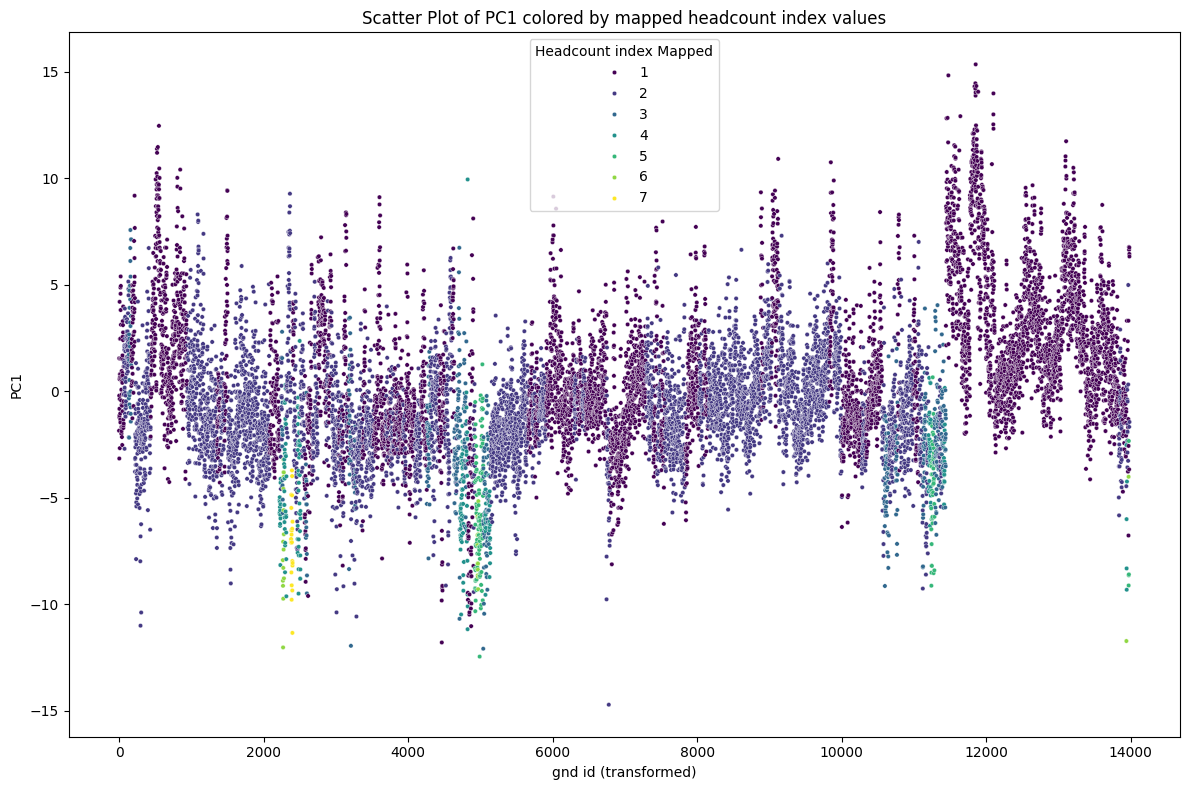

In [38]:
merged['continuous_code_7'] = pd.factorize(merged['code_7'])[0]

plt.figure(figsize=(12, 8))
sns.scatterplot(data=merged, x='continuous_code_7', y='PC1', hue='mapped_hi', palette='viridis', s=10)
plt.title('Scatter Plot of PC1 colored by mapped headcount index values')
plt.xlabel('gnd id (transformed)')
plt.ylabel('PC1')
plt.legend(title='Headcount index Mapped')

# Use tight_layout to ensure everything fits
plt.tight_layout()

# Save the figure
#plt.savefig('pca_scatter_with_headcount_index.png', format='png', dpi=300)

# Show the plot
plt.show()

### Scatter plot 02: Mapped PC1 vs headcount index, colored by mapped headcount index values

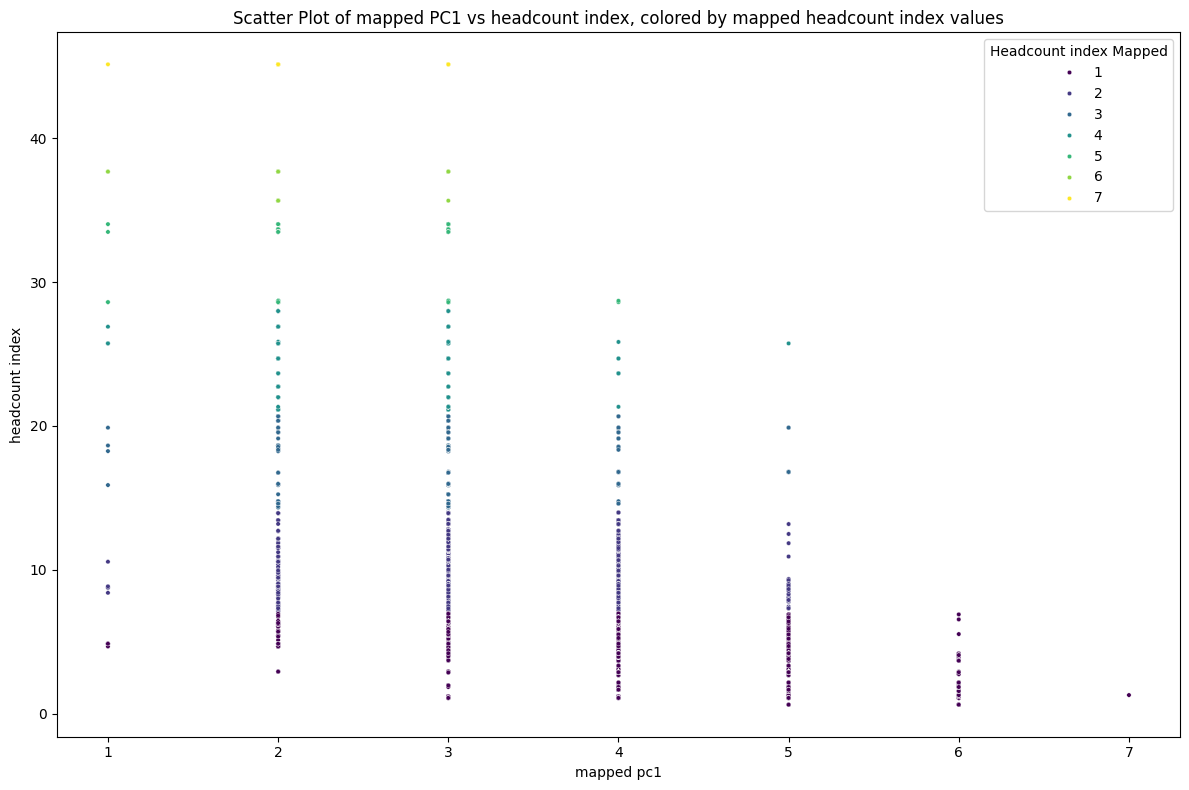

In [39]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=merged, x='mapped_pc1', y='headcount_index', hue='mapped_hi', palette='viridis', s=10)
plt.title('Scatter Plot of mapped PC1 vs headcount index, colored by mapped headcount index values')
plt.xlabel('mapped pc1')
plt.ylabel('headcount index')
plt.legend(title='Headcount index Mapped')

# Use tight_layout to ensure everything fits
plt.tight_layout()

# Save the figure
#plt.savefig('pca_scatter_with_headcount_index.png', format='png', dpi=300)

# Show the plot
plt.show()

### Scatter plot 03: Scatter Plot of mapped PC1 VS mapped headcount index values

### Doesnt make much sense since, all the values are mapped to integers, so a dot will be a stack of many GNDs

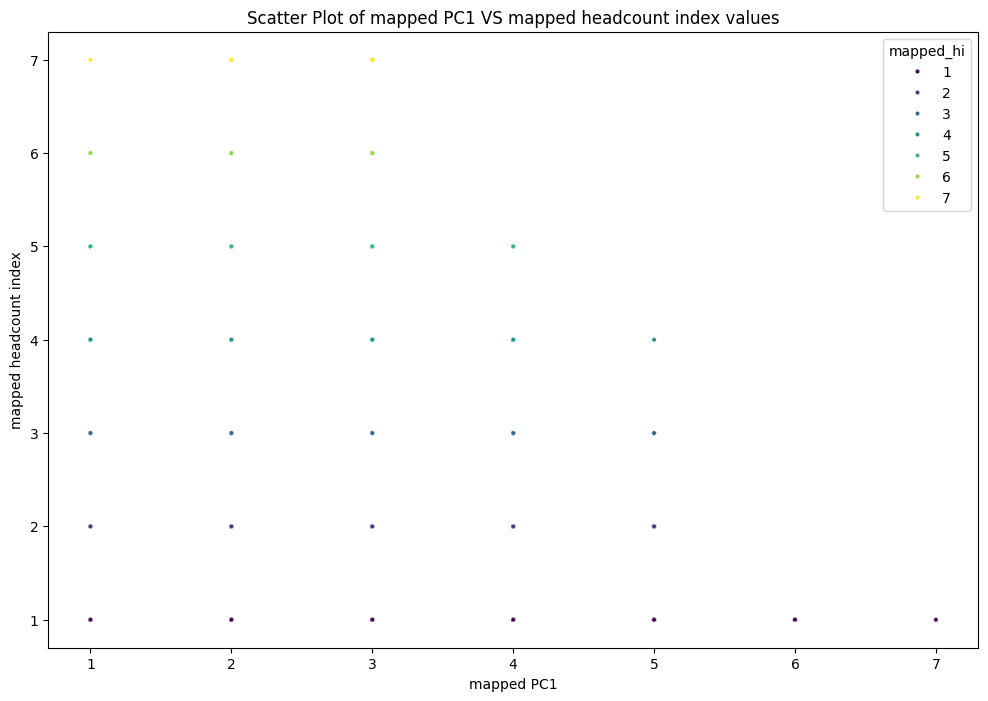

In [40]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=merged, x='mapped_pc1', y='mapped_hi', hue='mapped_hi', palette='viridis', s=10)
#plt.title('Scatter Plot of PC1 colored by mapped headcount index values')
plt.title('Scatter Plot of mapped PC1 VS mapped headcount index values')
plt.xlabel('mapped PC1')
plt.ylabel('mapped headcount index')
plt.show()

### Scatter plot 04: Taking the heatmap approach to overcome the above issue

## where zones with higher frequency of PC1 and Headcount index would be "warmer"

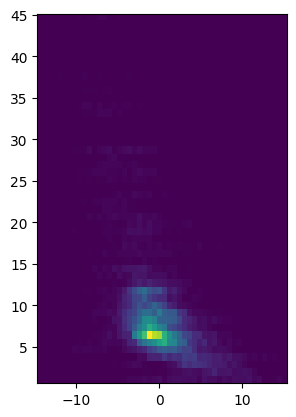

In [41]:
heatmap, xedges, yedges = np.histogram2d(merged['PC1'], merged['headcount_index'], bins=50)

extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.show()

### Plot 04: Plotting a Hexbin (similar concept to plot 03)

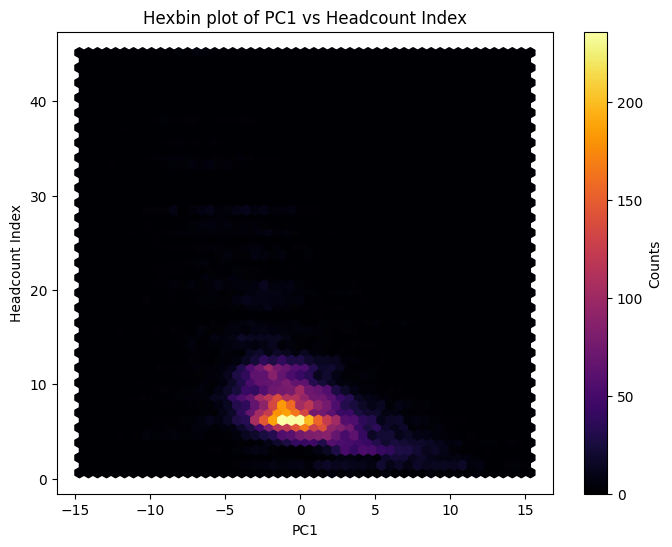

In [42]:
plt.figure(figsize=(8, 6))
hb = plt.hexbin(merged['PC1'], merged['headcount_index'], gridsize=50, cmap='inferno')

cb = plt.colorbar(hb, label='Counts')

plt.xlabel('PC1')
plt.ylabel('Headcount Index')
plt.title('Hexbin plot of PC1 vs Headcount Index')

# Show the plot
plt.show()

In [44]:
merged[['PC1', 'headcount_index']].describe()

,PC1,headcount_index
count,13985.000000,13985.000000
mean,-0.000329,8.240031
std,3.296913,5.112244
min,-14.711504,0.620000
25%,-2.023906,5.530000
50%,-0.373150,7.100000
75%,1.708907,9.360000
max,15.340470,45.140000


### Based on the statistical description above and the hexbin plot, we observe that the mean of `PC1` is around 0.0, while the mean of the `Headcount Index` is approximately 8. The hexbin plot reveals that Grama Niladhari Divisions with a `PC1` close to the mean also tend to have a `Headcount Index` near the mean. This suggests that `PC1` is a good generalization of the `Headcount Index` (indicating a strong relationship). 